In [1]:
%matplotlib inline
from matplotlib import pyplot as plt

In [2]:
from sumatreant import load_sumatreant

In [3]:
df = load_sumatreant("benchmark7")

/data/guyer/sumatra/sumatra/programs.py:77: Warning: Python could not be found. Please supply the path to the /data/guyer/miniconda2/envs/fipy/bin/python executable.
  warnings.warn(errmsg)
/data/guyer/sumatra/sumatra/parameters.py:156: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  self.values = yaml.load(initialiser)
/data/guyer/sumatra/sumatra/programs.py:77: Warning: /data/guyer/miniconda2/envs/fipy/bin/mpiexec could not be found. Please supply the path to the /data/guyer/miniconda2/envs/fipy/bin/mpiexec executable.
  warnings.warn(errmsg)


In [6]:
scaling = df[df['tags'].map(lambda x: '_finished_' in x and 'scaling' in x)]
with open('scaling.csv', 'w') as f:
    f.write("""
# Data extracted from CTCMS.nist.gov:/data/guyer/CHiMaDPhaseFieldVI
# Extracted from sumatra records that were tagged [`__finished__`, `scaling`]
# Data was generated with threadtest.{py,sh} to compare tradeoffs between
# MPI cpus and OpenMP threads using a Method of Manufactured Solutions
# Allen-Can problem based on https://pages.nist.gov/pfhub/benchmarks/benchmark7.ipynb
""")
scaling.to_csv('scaling.csv', mode='a')

In [8]:
threading = df[df['tags'].map(lambda x: '_finished_' in x and 'threading' in x)]
with open('threading.csv', 'w') as f:
    f.write("""
# Data extracted from CTCMS.nist.gov:/data/guyer/CHiMaDPhaseFieldVI
# Extracted from sumatra records that were tagged [`__finished__`, `threading`]
# Data was generated with threadtest.{py,sh} to compare tradeoffs between
# MPI cpus and OpenMP threads using a Method of Manufactured Solutions
# Allen-Can problem based on https://pages.nist.gov/pfhub/benchmarks/benchmark7.ipynb
""")
threading.to_csv('threading.csv', mode='a')

/data/guyer/miniconda3/envs/petsc27/lib/python2.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/data/guyer/miniconda3/envs/petsc27/lib/python2.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


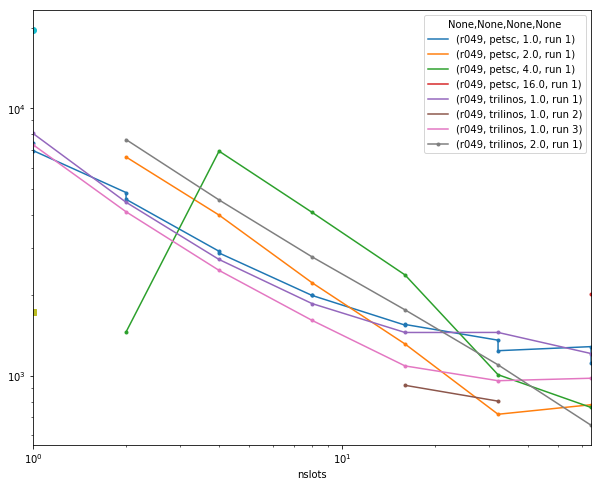

In [13]:
scaling = df[df['tags'].map(lambda x: '_finished_' in x and 'scaling' in x)]
scaling['node'] = scaling.platforms.map(lambda x: x[0]['network_name'])
scaling['dataset'] = "run 1"
scaling.loc[(scaling.nx == 1000) & (scaling.solver == "trilinos") & (scaling.nthreads == 1) & (scaling.timestamp < "2020-01-08 15:00:00"), 'dataset'] = "run 1"
scaling.loc[(scaling.nx == 1000) & (scaling.solver == "trilinos") & (scaling.nthreads == 1) & (scaling.timestamp > "2020-01-08 15:00:00") & (scaling.timestamp < "2020-01-08 17:00:00"), 'dataset'] = "run 2"
scaling.loc[(scaling.nx == 1000) & (scaling.solver == "trilinos") & (scaling.nthreads == 1) & (scaling.timestamp > "2020-01-08 17:00:00"), 'dataset'] = "run 3"
scaling.set_index('nslots', inplace=True)
pysparse = scaling[(scaling.nx == 1000) & (scaling.totaltime == 8.) & (scaling.solver == "pysparse")]
scipy = scaling[(scaling.nx == 1000) & (scaling.totaltime == 8.) & (scaling.solver == "scipy")]
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111)
scaling[(scaling.nx == 1000) & (scaling.totaltime == 8.) & (scaling.solver != "pysparse") & (scaling.solver != "scipy")].sort_values(["solver", "nthreads", "ncpus"]).groupby(["node", "solver", "nthreads", "dataset"])['solvetime'].plot(loglog=True, sharey=True, legend=True, marker=".", ax=ax)
ax.plot(list(pysparse.index), list(pysparse.solvetime), marker="s")
ax.plot(list(scipy.index), list(scipy.solvetime), marker="o")

/data/guyer/miniconda3/envs/petsc27/lib/python2.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/data/guyer/miniconda3/envs/petsc27/lib/python2.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/data/guyer/miniconda3/envs/petsc27/lib/python2.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc

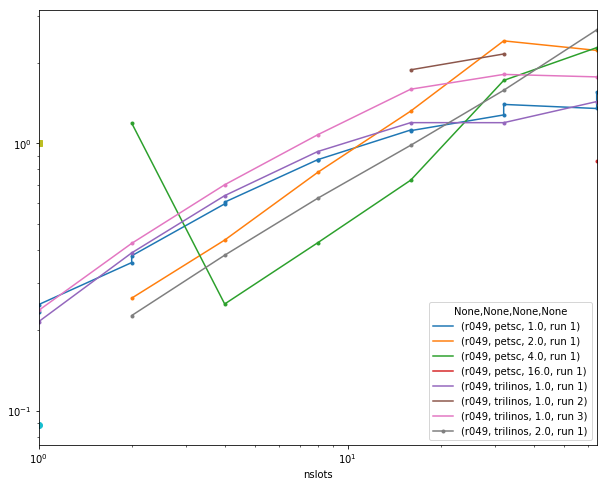

In [6]:
scaling = df[df['tags'].map(lambda x: '_finished_' in x and 'scaling' in x)]
scaling['node'] = scaling.platforms.map(lambda x: x[0]['network_name'])
scaling['dataset'] = "run 1"
scaling.loc[(scaling.nx == 1000) & (scaling.solver == "trilinos") & (scaling.nthreads == 1) & (scaling.timestamp < "2020-01-08 15:00:00"), 'dataset'] = "run 1"
scaling.loc[(scaling.nx == 1000) & (scaling.solver == "trilinos") & (scaling.nthreads == 1) & (scaling.timestamp > "2020-01-08 15:00:00") & (scaling.timestamp < "2020-01-08 17:00:00"), 'dataset'] = "run 2"
scaling.loc[(scaling.nx == 1000) & (scaling.solver == "trilinos") & (scaling.nthreads == 1) & (scaling.timestamp > "2020-01-08 17:00:00"), 'dataset'] = "run 3"
scaling['speedup'] = scaling[(scaling.nx == 1000) & (scaling.totaltime == 8.) & (scaling.solver == "pysparse")].iloc[0].solvetime / scaling.solvetime
scaling.set_index('nslots', inplace=True)
pysparse = scaling[(scaling.nx == 1000) & (scaling.totaltime == 8.) & (scaling.solver == "pysparse")]
scipy = scaling[(scaling.nx == 1000) & (scaling.totaltime == 8.) & (scaling.solver == "scipy")]
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111)
scaling[(scaling.nx == 1000) & (scaling.totaltime == 8.) & (scaling.solver != "pysparse") & (scaling.solver != "scipy")].sort_values(["solver", "nthreads", "ncpus"]).groupby(["node", "solver", "nthreads", "dataset"])['speedup'].plot(loglog=True, sharey=True, legend=True, marker=".", ax=ax)
ax.plot(list(pysparse.index), list(pysparse.speedup), marker="s")
ax.plot(list(scipy.index), list(scipy.speedup), marker="o")

/data/guyer/miniconda3/envs/petsc27/lib/python2.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/data/guyer/miniconda3/envs/petsc27/lib/python2.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys


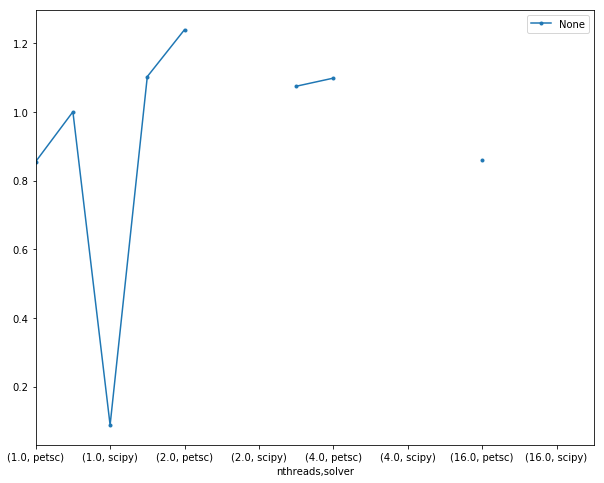

In [35]:
scaling = df[df['tags'].map(lambda x: '_finished_' in x and 'scaling' in x)]
scaling['node'] = scaling.platforms.map(lambda x: x[0]['network_name'])
# scaling['dataset'] = "run 1"
# scaling.loc[(scaling.nx == 1000) & (scaling.solver == "trilinos") & (scaling.nthreads == 1) & (scaling.timestamp < "2020-01-08 15:00:00"), 'dataset'] = "run 1"
# scaling.loc[(scaling.nx == 1000) & (scaling.solver == "trilinos") & (scaling.nthreads == 1) & (scaling.timestamp > "2020-01-08 15:00:00") & (scaling.timestamp < "2020-01-08 17:00:00"), 'dataset'] = "run 2"
# scaling.loc[(scaling.nx == 1000) & (scaling.solver == "trilinos") & (scaling.nthreads == 1) & (scaling.timestamp > "2020-01-08 17:00:00"), 'dataset'] = "run 3"
scaling['speedup'] = scaling[(scaling.nx == 1000) & (scaling.totaltime == 8.) & (scaling.solver == "pysparse")].iloc[0].solvetime / scaling.solvetime
scaling.set_index('nslots', inplace=True)
#pysparse = scaling[(scaling.nx == 1000) & (scaling.totaltime == 8.) & (scaling.solver == "pysparse")]
#scipy = scaling[(scaling.nx == 1000) & (scaling.totaltime == 8.) & (scaling.solver == "scipy")]
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111)
speedup = scaling[(scaling.nx == 1000) & (scaling.totaltime == 8.)].sort_values("nslots").groupby(["solver", "nthreads"])
speedup['speedup'].mean().unstack().unstack().plot(sharey=True, legend=True, marker=".", ax=ax)
# ax.plot(list(pysparse.index), list(pysparse.speedup), marker="s")
# ax.plot(list(scipy.index), list(scipy.speedup), marker="o")

In [7]:
scaling.plot?

In [25]:
scaling = df[df['tags'].map(lambda x: '_finished_' in x and 'scaling' in x)]
scaling['node'] = scaling.platforms.map(lambda x: x[0]['network_name'])
scaling['dataset'] = "run 1"
scaling.loc[(scaling.nx == 1000) & (scaling.solver == "trilinos") & (scaling.nthreads == 1) & (scaling.timestamp < "2020-01-08 15:00:00"), 'dataset'] = "run 1"
scaling.loc[(scaling.nx == 1000) & (scaling.solver == "trilinos") & (scaling.nthreads == 1) & (scaling.timestamp > "2020-01-08 15:00:00") & (scaling.timestamp < "2020-01-08 17:00:00"), 'dataset'] = "run 2"
scaling.loc[(scaling.nx == 1000) & (scaling.solver == "trilinos") & (scaling.nthreads == 1) & (scaling.timestamp > "2020-01-08 17:00:00"), 'dataset'] = "run 3"
scaling[(scaling.nx == 1000) & (scaling.totaltime == 8.) & (scaling.ncpus == 1)].sort_values(["solver", "nthreads", "ncpus"])[["solver", "solvetime"]]

/data/guyer/miniconda3/envs/petsc27/lib/python2.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/data/guyer/miniconda3/envs/petsc27/lib/python2.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,solver,solvetime
label,,
3f4357f743d4,petsc,7419.662807
8f02a2bcc6a8,petsc,6946.392326
0b62439a2c42,petsc,6572.978373
3861c7616be5,petsc,6911.733029
b601aa5d0084,pysparse,1733.358881
0632e8a6a20c,scipy,19621.971573
47c93a82250a,trilinos,7303.857546
e36bee269820,trilinos,8045.972098
8fdd375df3da,trilinos,7634.012615


In [8]:
scaling = df[df['tags'].map(lambda x: '_finished_' in x and 'scaling' in x)]
scaling['node'] = scaling.platforms.map(lambda x: x[0]['network_name'])
scaling['dataset'] = "run 1"
scaling['mprof'] = scaling.tags.map(lambda x: "mprof" in x)
scaling.loc[(scaling.nx == 1000) & (scaling.solver == "trilinos") & (scaling.nthreads == 1) & (scaling.timestamp < "2020-01-08 15:00:00"), 'dataset'] = "run 1"
scaling.loc[(scaling.nx == 1000) & (scaling.solver == "trilinos") & (scaling.nthreads == 1) & (scaling.timestamp > "2020-01-08 15:00:00") & (scaling.timestamp < "2020-01-08 17:00:00"), 'dataset'] = "run 2"
scaling.loc[(scaling.nx == 1000) & (scaling.solver == "trilinos") & (scaling.nthreads == 1) & (scaling.timestamp > "2020-01-08 17:00:00"), 'dataset'] = "run 3"
scaling[scaling.nx == 1000].sort_values(["solver", "nthreads", "ncpus"])[["timestamp", "duration", "solvetime", "nslots", "ncpus", "mprof"]]

/data/guyer/miniconda3/envs/petsc27/lib/python2.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/data/guyer/miniconda3/envs/petsc27/lib/python2.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/data/guyer/miniconda3/envs/petsc27/lib/python2.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc

,timestamp,duration,solvetime,nslots,ncpus,mprof
label,,,,,,
3f4357f743d4,2020-01-13 14:47:30,7583.956343,7419.662807,1.0,1.0,False
8f02a2bcc6a8,2020-01-08 18:19:12,7325.633923,6946.392326,1.0,1.0,True
f25232f1ba1d,2020-01-13 14:36:16,220.162794,59.043297,1.0,1.0,False
2fea4703cba5,2020-01-13 14:47:36,4969.172998,4839.376903,2.0,2.0,False
58fd3f64ccf8,2020-01-08 18:19:12,4949.391638,4564.994960,2.0,2.0,True
475e265c9d94,2020-01-08 18:19:12,3366.231263,2919.485724,4.0,4.0,True
d61061f7b2e2,2020-01-13 14:48:27,3015.778658,2876.842309,4.0,4.0,False
237192a8fbaa,2020-01-08 18:19:12,2325.185423,1996.392569,8.0,8.0,True
b1d990033949,2020-01-13 14:48:27,2172.261151,1996.424031,8.0,8.0,False


In [9]:
scaling = df[df['tags'].map(lambda x: '_finished_' in x and 'scaling' in x)]
scaling['node'] = scaling.platforms.map(lambda x: x[0]['network_name'])
scaling.loc[(scaling.nx == 1000) & (scaling.solver == "trilinos") & (scaling.nthreads == 1) & (scaling.timestamp < "2020-01-08 15:00:00"), 'dataset'] = "run 1"
scaling.loc[(scaling.nx == 1000) & (scaling.solver == "trilinos") & (scaling.nthreads == 1) & (scaling.timestamp > "2020-01-08 15:00:00") & (scaling.timestamp < "2020-01-08 17:00:00"), 'dataset'] = "run 2"
scaling.loc[(scaling.nx == 1000) & (scaling.solver == "trilinos") & (scaling.nthreads == 1) & (scaling.timestamp > "2020-01-08 17:00:00"), 'dataset'] = "run 3"
scaling[(scaling.nx == 1000) & (scaling.solver == "trilinos") & (scaling.nthreads == 1)].sort_values(["timestamp", "ncpus"])[["timestamp", "duration", "solvetime", "nslots", "ncpus"]]

/data/guyer/miniconda3/envs/petsc27/lib/python2.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/data/guyer/miniconda3/envs/petsc27/lib/python2.7/site-packages/pandas/core/indexing.py:362: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[key] = _infer_fill_value(value)


,timestamp,duration,solvetime,nslots,ncpus
label,,,,,
3491af744979,2020-01-08 13:59:15,1744.936417,1210.752897,64.0,64.0
0f17a829a4c6,2020-01-08 14:36:11,1580.537781,1451.918814,32.0,32.0
5ab3f00ce4ba,2020-01-08 14:36:17,1574.957971,1451.427686,16.0,16.0
2769195f0d21,2020-01-08 14:36:31,1970.429838,1861.200499,8.0,8.0
f123f45f3093,2020-01-08 14:36:46,2857.383503,2720.434578,4.0,4.0
fcb80b5b4a7f,2020-01-08 14:36:49,4592.438665,4452.270644,2.0,2.0
e36bee269820,2020-01-08 14:36:50,8244.105864,8045.972098,1.0,1.0
fcf2c20e7578,2020-01-08 16:36:07,1076.842322,921.127250,16.0,16.0
22e007d052f0,2020-01-08 16:36:12,1077.695103,803.875242,32.0,32.0


node  solver    nslots
r001  petsc     32.0      AxesSubplot(0.125,0.125;0.775x0.755)
      trilinos  32.0      AxesSubplot(0.125,0.125;0.775x0.755)
r025  trilinos  16.0      AxesSubplot(0.125,0.125;0.775x0.755)
                32.0      AxesSubplot(0.125,0.125;0.775x0.755)
r049  petsc     32.0      AxesSubplot(0.125,0.125;0.775x0.755)
      trilinos  32.0      AxesSubplot(0.125,0.125;0.775x0.755)
Name: solvetime, dtype: object

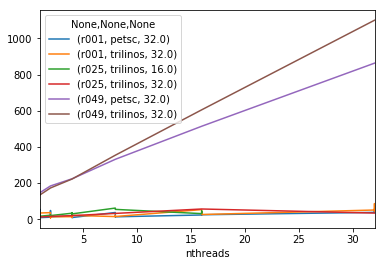

In [10]:
threading = df[df['tags'].map(lambda x: '_finished_' in x and 'threading' in x)]
threading = threading[threading.ncpus * threading.nthreads == threading.nslots]
threading['node'] = threading.platforms.map(lambda x: x[0]['network_name'])
threading.loc[threading.node == "r025", "solver"] = "trilinos"
threading.set_index('nthreads', inplace=True)
threading[(threading.nx == 400)].sort_values(["solver", "ncpus", "nthreads"]).groupby(["node","solver","nslots"])['solvetime'].plot(legend=True)

node  solver    nslots
r049  petsc     32.0      AxesSubplot(0.125,0.125;0.775x0.755)
      trilinos  32.0      AxesSubplot(0.125,0.125;0.775x0.755)
Name: solvetime, dtype: object

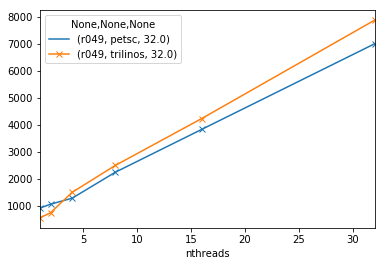

In [12]:
threading = df[df['tags'].map(lambda x: '_finished_' in x and 'threading_addpetsc' in x)]
threading = threading[threading.ncpus * threading.nthreads == threading.nslots]
threading['node'] = threading.platforms.map(lambda x: x[0]['network_name'])
threading.loc[threading.node == "r025", "solver"] = "trilinos"
threading.set_index('nthreads', inplace=True)
threading[(threading.nx == 1000)].sort_values(["solver", "ncpus", "nthreads"]).groupby(["node","solver","nslots"])['solvetime'].plot(legend=True, marker="x")

/data/guyer/miniconda3/envs/petsc27/lib/python2.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


node  solver    nthreads
r049  petsc     1.0         AxesSubplot(0.125,0.125;0.775x0.755)
                2.0         AxesSubplot(0.125,0.125;0.775x0.755)
                4.0         AxesSubplot(0.125,0.125;0.775x0.755)
                16.0        AxesSubplot(0.125,0.125;0.775x0.755)
      pysparse  1.0         AxesSubplot(0.125,0.125;0.775x0.755)
      scipy     1.0         AxesSubplot(0.125,0.125;0.775x0.755)
      trilinos  1.0         AxesSubplot(0.125,0.125;0.775x0.755)
                2.0         AxesSubplot(0.125,0.125;0.775x0.755)
Name: solvetime, dtype: object

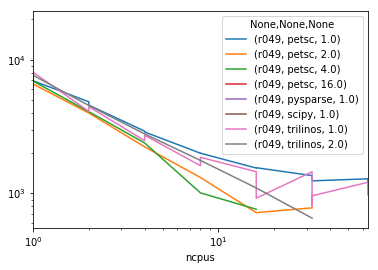

In [13]:
scaling = df[df['tags'].map(lambda x: '_finished_' in x and 'scaling' in x)]
scaling['node'] = scaling.platforms.map(lambda x: x[0]['network_name'])
scaling.set_index('ncpus', inplace=True)
scaling[(scaling.nx == 1000) & (scaling.totaltime == 8.)].sort_values(["solver", "nthreads", "ncpus"]).groupby(["node", "solver", "nthreads"])['solvetime'].plot(loglog=True, sharey=True, legend=True)# ax=ax)

In [14]:
scaling = df[df['tags'].map(lambda x: '_finished_' in x and 'scaling' in x)]
scaling.sort_values("timestamp")[["timestamp", "ncpus", "nthreads", "nslots", "totaltime"]]

,timestamp,ncpus,nthreads,nslots,totaltime
label,,,,,
601ffbd19c0d,2020-01-02 14:20:13,32.0,1.0,32.0,8.00
fb978eda8bc0,2020-01-02 14:20:13,8.0,1.0,8.0,8.00
0caccf93735b,2020-01-02 14:20:13,4.0,1.0,4.0,8.00
9a01c58fda62,2020-01-02 14:20:13,16.0,1.0,16.0,8.00
f41bc322992c,2020-01-02 14:20:13,2.0,1.0,2.0,8.00
46baa22008d7,2020-01-02 14:20:13,1.0,1.0,1.0,8.00
812eff7cc2dd,2020-01-02 15:17:41,1.0,1.0,1.0,8.00
8afdecc72682,2020-01-02 15:20:08,2.0,1.0,2.0,8.00
840430c12f77,2020-01-02 15:20:23,8.0,1.0,8.0,8.00


/data/guyer/miniconda3/envs/petsc27/lib/python2.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/data/guyer/miniconda3/envs/petsc27/lib/python2.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


node  solver    nthreads  dataset
r049  petsc     1.0       run 1      AxesSubplot(0.125,0.125;0.775x0.755)
                          run 2      AxesSubplot(0.125,0.125;0.775x0.755)
                2.0       run 1      AxesSubplot(0.125,0.125;0.775x0.755)
                4.0       run 1      AxesSubplot(0.125,0.125;0.775x0.755)
                16.0      run 1      AxesSubplot(0.125,0.125;0.775x0.755)
      pysparse  1.0       run 1      AxesSubplot(0.125,0.125;0.775x0.755)
      scipy     1.0       run 1      AxesSubplot(0.125,0.125;0.775x0.755)
      trilinos  1.0       run 1      AxesSubplot(0.125,0.125;0.775x0.755)
                          run 2      AxesSubplot(0.125,0.125;0.775x0.755)
                          run 3      AxesSubplot(0.125,0.125;0.775x0.755)
                2.0       run 1      AxesSubplot(0.125,0.125;0.775x0.755)
Name: solvetime, dtype: object

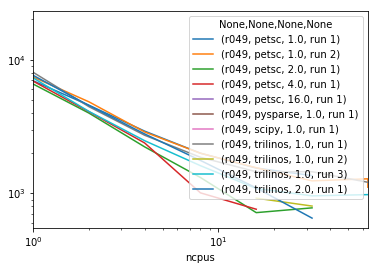

In [15]:
scaling = df[df['tags'].map(lambda x: '_finished_' in x and ('scaling' in x))]
scaling['node'] = scaling.platforms.map(lambda x: x[0]['network_name'])
scaling['dataset'] = "run 1"
scaling.loc[(scaling.nx == 1000) & (scaling.solver == "trilinos") & (scaling.nthreads == 1) & (scaling.timestamp < "2020-01-08 15:00:00"), 'dataset'] = "run 1"
scaling.loc[(scaling.nx == 1000) & (scaling.solver == "trilinos") & (scaling.nthreads == 1) & (scaling.timestamp > "2020-01-08 15:00:00") & (scaling.timestamp < "2020-01-08 17:00:00"), 'dataset'] = "run 2"
scaling.loc[(scaling.nx == 1000) & (scaling.solver == "trilinos") & (scaling.nthreads == 1) & (scaling.timestamp > "2020-01-08 17:00:00"), 'dataset'] = "run 3"
scaling.loc[(scaling.nx == 1000) & (scaling.solver == "petsc") & (scaling.nthreads == 1) & (scaling.timestamp > "2020-01-13 14:45:00"), 'dataset'] = "run 2"
scaling.set_index('ncpus', inplace=True)
scaling[(scaling.nx == 1000) & (scaling.totaltime == 8.)].sort_values(["solver", "nthreads", "ncpus"]).groupby(["node", "solver", "nthreads", "dataset"])['solvetime'].plot(loglog=True, sharey=True, legend=True)# ax=ax)

/data/guyer/miniconda3/envs/petsc27/lib/python2.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/data/guyer/miniconda3/envs/petsc27/lib/python2.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


node  solver    nthreads  dataset
r049  petsc     1.0       run 1      AxesSubplot(0.125,0.125;0.775x0.755)
                          run 2      AxesSubplot(0.125,0.125;0.775x0.755)
                2.0       run 1      AxesSubplot(0.125,0.125;0.775x0.755)
                4.0       run 1      AxesSubplot(0.125,0.125;0.775x0.755)
                16.0      run 1      AxesSubplot(0.125,0.125;0.775x0.755)
      pysparse  1.0       run 1      AxesSubplot(0.125,0.125;0.775x0.755)
      scipy     1.0       run 1      AxesSubplot(0.125,0.125;0.775x0.755)
      trilinos  1.0       run 1      AxesSubplot(0.125,0.125;0.775x0.755)
                          run 2      AxesSubplot(0.125,0.125;0.775x0.755)
                          run 3      AxesSubplot(0.125,0.125;0.775x0.755)
                2.0       run 1      AxesSubplot(0.125,0.125;0.775x0.755)
Name: solvetime, dtype: object

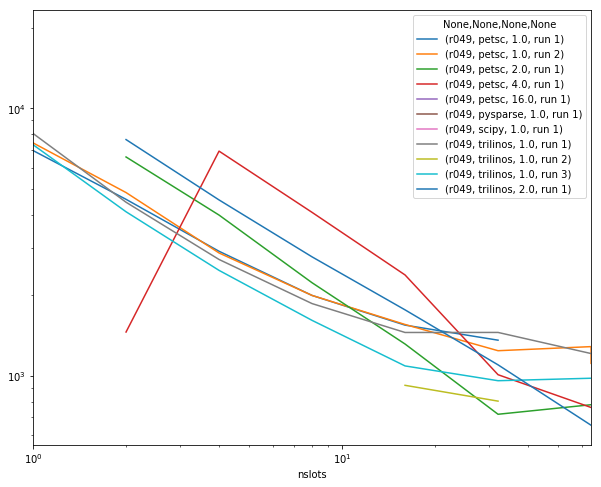

In [16]:
scaling = df[df['tags'].map(lambda x: '_finished_' in x and ('scaling' in x))]
scaling['node'] = scaling.platforms.map(lambda x: x[0]['network_name'])
scaling['dataset'] = "run 1"
scaling.loc[(scaling.nx == 1000) & (scaling.solver == "trilinos") & (scaling.nthreads == 1) & (scaling.timestamp < "2020-01-08 15:00:00"), 'dataset'] = "run 1"
scaling.loc[(scaling.nx == 1000) & (scaling.solver == "trilinos") & (scaling.nthreads == 1) & (scaling.timestamp > "2020-01-08 15:00:00") & (scaling.timestamp < "2020-01-08 17:00:00"), 'dataset'] = "run 2"
scaling.loc[(scaling.nx == 1000) & (scaling.solver == "trilinos") & (scaling.nthreads == 1) & (scaling.timestamp > "2020-01-08 17:00:00"), 'dataset'] = "run 3"
scaling.loc[(scaling.nx == 1000) & (scaling.solver == "petsc") & (scaling.nthreads == 1) & (scaling.timestamp > "2020-01-13 14:45:00"), 'dataset'] = "run 2"
# scaling.loc[(scaling.nx == 1000) & (scaling.solver == "petsc") & (scaling.nthreads == 2) & (scaling.timestamp > "2020-01-14 14:00:00"), 'dataset'] = "run 2"
scaling.set_index('nslots', inplace=True)
scaling[(scaling.nx == 1000) & (scaling.totaltime == 8.)].sort_values(["solver", "nthreads", "ncpus"]).groupby(["node", "solver", "nthreads", "dataset"])['solvetime'].plot(loglog=True, sharey=True, legend=True, figsize=(10,8))# ax=ax)

In [17]:
scaling = df[df['tags'].map(lambda x: '_finished_' in x and ('scaling' in x))]
scaling['node'] = scaling.platforms.map(lambda x: x[0]['network_name'])
#scaling['dataset'] = "run 1"
#scaling.loc[(scaling.nx == 1000) & (scaling.solver == "petsc") & (scaling.nthreads == 1) & (scaling.timestamp > "2020-01-13 14:45:00"), 'dataset'] = "run 2"
# scaling.loc[(scaling.nx == 1000) & (scaling.solver == "petsc") & (scaling.nthreads == 2) & (scaling.timestamp > "2020-01-14 14:00:00"), 'dataset'] = "run 2"
scaling[(scaling.nx == 1000) & (scaling.totaltime == 8.) & (scaling.nthreads == 4) & (scaling.solver == "petsc")].sort_values(["solver", "nthreads", "ncpus"])[["ncpus", "nthreads", "nslots", "solvetime"]]

/data/guyer/miniconda3/envs/petsc27/lib/python2.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,ncpus,nthreads,nslots,solvetime
label,,,,
f60f679f6d6e,0.0,4.0,2.0,1457.133022
3861c7616be5,1.0,4.0,4.0,6911.733029
94a65481724f,2.0,4.0,8.0,4080.891229
e52313ae6f63,4.0,4.0,16.0,2381.376495
3e8fb823e443,8.0,4.0,32.0,1009.186369
96c222f841bb,16.0,4.0,64.0,761.243445


What does `ncpus = 0` even mean!?

In [18]:
pysparse = df[df.solver == "pysparse"]

In [19]:
len(pysparse)

2

In [20]:
pysparse[["timestamp", "ncpus", "nthreads", "nslots", "totaltime", "nx", "solvetime"]]

,timestamp,ncpus,nthreads,nslots,totaltime,nx,solvetime
label,,,,,,,
b601aa5d0084,2020-01-16 13:04:32,1.0,1.0,1.0,8.0,1000.0,1733.358881
cfe4cae35cc1,2019-12-30 17:48:48,1.0,1.0,1.0,8.0,100.0,29.696584
